        Polinómios
* `x^7 - 3.7x^4 + 5x^3 - 88`
* `2x^2 + 17`
* `7x^4 + 6x^3 - x^2 + 43`
* `x^4`
* `x^2`
* `x^3`

In [122]:
#Modelo
#p0 = [(coeficiente, grau)]

p1 = [(1, 7),(-3.7, 4), (5, 3), (-88, 0)]

p2 = [(2, 2), (17, 0)]

p3 = [(7, 4), (6, 3), (-1, 2), (43, 0)]

p4 = [(1, 4)]

p5 = [(1, 2)]

p6 = [(1, 3)]

In [123]:
def savePolinomios(listaP, fName):
    file = open(fName, "w")
    for p in listaP:
        for termo in p:
            coeficiente, grau = termo
            file.write(str(coeficiente) + " ; " + str(grau) + " | ")
        file.write("\n")
    file.close()

listaP = [p1, p2, p3, p4, p5, p6]
savePolinomios(listaP,"Polinomios.txt")

In [124]:
def derivada(p):
    deriv = []
    for termo in p:
            coeficiente, grau = termo
            termoDeriv = coeficiente * grau, grau - 1
            if coeficiente * grau != 0:
                deriv.append(termoDeriv)
                
    return deriv

In [125]:
def somaPolinomios(polinomio1, polinomio2):
    soma = []
    i = 0
    j = 0
    while i < len(polinomio1) and j < len(polinomio2):
        coeficiente1, grau1 = polinomio1[i]
        coeficiente2, grau2 = polinomio2[j]
        if grau1 == grau2:
            coeficiente = coeficiente1 + coeficiente2
            grau = grau1 = grau2
            soma.append((coeficiente, grau))
            i = i + 1
            j = j + 1
        elif grau1 > grau2:
            soma.append((coeficiente1, grau1))
            i = i + 1
        elif grau2 > grau1:
            soma.append((coeficiente2, grau2))
            j = j + 1

    return soma

In [126]:
import matplotlib.pyplot as plt

def graf(p):
    i = 0
    x = []
    y = []
    while i < len(p):
        abcissa = p[i][0]
        ordenada = p[i][1]
        x.append(abcissa)
        y.append(ordenada)
        i = i + 1
    plt.plot(x, y, color = 'black', linewidth = 3, marker = 'o', markerfacecolor = 'black', markersize = 5)
    plt.xlabel('Coeficiente')
    plt.ylabel('Grau')
    plt.title('Polinómio')
    plt.show()

    return

[(7, 6), (-14.8, 3), (15, 2)]
[(7, 4), (6, 3), (1, 2), (60, 0)]


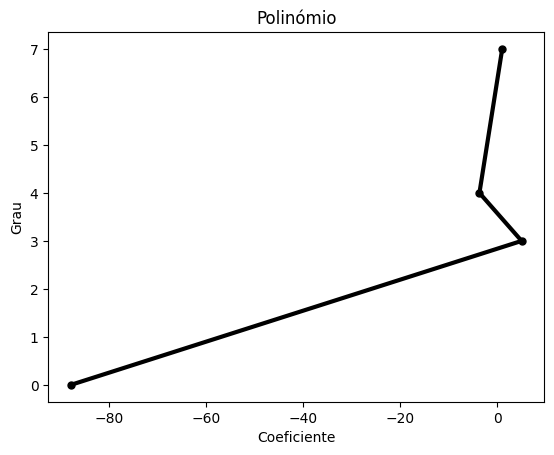

In [127]:
#Teste às funções

print(derivada(p1))

print(somaPolinomios(p2, p3))

graf(p1)


## Aplicação

In [128]:
def menu():
    print(""" 
    (1) Criar um polinómio.
    (2) Ler lista de polinómios do ficheiro.
    (3) Listar polinómios.
    (4) Calcular o valor de um polinómio num ponto.
    (5) Listar polinómios com grau.
    (6) Polinómio de maior grau.
    (7) Derivada do polinómio.
    (8) Somar dois polinómios.
    (9) Representação gráfica do polinómio.
    (10) Gravar polinómios no ficheiro.
    (0) Sair.
    """)

#1

def criaPol():
    resPol = []
    grau = int(input ("Introduza o grau do polinómio:"))
    while grau > 0:
        coeficiente = int(input ("Introduza o coeficiente:"))
        if coeficiente != 0:
            termo = (coeficiente, grau)
            resPol.append(termo)
        grau = grau - 1
    
    return resPol

#2

def lerPol(listaPol):
    lista = []
    file = open(listaPol, "r")
    for line in file:
        termos = line.split(" | ")
        p = []
        for termo in termos:
            termo1 = termo.split(" , ")
            if len(termo1) > 1:
                coeficiente = termo1[0]
                grau = termo1[1]
                p.append((coeficiente, grau))
        lista.append(p)
    return lista

#3

def listar(listaPol):
    p = {}
    i = 1
    while i <= len(listaPol):
        p[i] = listaPol[i - 1]
        i = i + 1
    print("Ordem :: Polinómio")
    print("------------------")
    for chave in p:
        print(chave," | ", p[chave])
    return

#4

def pot(a,b):
    res = 1
    while b > 0:
        res = res * a
        b = b - 1
    return res

def calcPolinomio(listaPol, num, x):
    pol = {}
    i = 1
    while i <= len(listaPol):
        pol[i] = listaPol[i - 1]
        i = i + 1
    res = 0
    p = pol[num]
    for termo in p:
        coeficiente, grau = termo 
        res = res + coeficiente * pot(x, grau)
    return res

#5

def listarGrau(listaPol):
    p = {}
    i = 1
    while i <= len(listaPol):
        p[i] = [listaPol[i - 1], listaPol[i - 1][0][1]]
        i = i + 1
    print("Ordem :: Polinómio :: Grau")
    print("--------------------------")
    for chave in p:
        pol, grau = p[chave]
        print(chave," | ", pol," | ", grau)
    return

#6

def grauMaior(listaPol):
    maior = 0
    p = {}
    i = 1
    while i <= len(listaPol):
        p[i] = [listaPol[i - 1], listaPol[i - 1][0][1]]
        i = i + 1
        for chave, valor in p.items():
            grau = valor[1]
            if grau > maior:
                maior = grau
                num = chave
    return (num, maior)

#7

def derivada(listaPol):
    deriv = []
    for p in listaPol:
        pol=[]
        for termo in p:
            coeficiente, grau = termo
            termoDeriv = coeficiente * grau, grau - 1
            if coeficiente * grau != 0:
                pol.append(termoDeriv)
        deriv.append(pol)

    derivada = {}
    i = 1

    while i <= len(listaPol):
        derivada[i] = [lista[i-1], res[i-1]]
        i = i + 1
    print("Ordem :: Polinómio :: Derivada")
    print("------------------------------")
    for chave in derivada:
        poli, deriv= derivada[chave]
        print(chave," | ", poli, " |", deriv)
    return 

#8

def somaPolinomios(polinomio1, polinomio2):
    soma = []
    i = 0
    j = 0
    while i < len(polinomio1) and j < len(polinomio2):
        coeficiente1, grau1 = polinomio1[i]
        coeficiente2, grau2 = polinomio2[j]
        if grau1 == grau2:
            coeficiente = coeficiente1 + coeficiente2
            grau = grau1 = grau2
            soma.append((coeficiente, grau))
            i = i + 1
            j = j + 1
        elif grau1 > grau2:
            soma.append((coeficiente1, grau1))
            i = i + 1
        elif grau2 > grau1:
            soma.append((coeficiente2, grau2))
            j = j + 1

    return soma

#9

import matplotlib.pyplot as plt

def graf(p):
    i = 0
    x = []
    y = []
    while i < len(p):
        abcissa = p[i][0]
        ordenada = p[i][1]
        x.append(abcissa)
        y.append(ordenada)
        i = i + 1
    plt.plot(x, y, color = 'black', linewidth = 3, marker = 'o', markerfacecolor = 'black', markersize = 5)
    plt.xlabel('Coeficiente')
    plt.ylabel('Grau')
    plt.title('Polinómio')
    plt.show()

    return

#10

def savePolinomios(listaP, fName):
    file = open(fName, "w")
    for p in listaP:
        for termo in p:
            coeficiente, grau = termo
            file.write(str(coeficiente) + " ; " + str(grau) + " | ")
        file.write("\n")
    file.close()

In [129]:
listaP = [p1, p2, p3, p4, p5, p6]

def display():
    menu()
    n = int(input("Introduza uma funcionalidade do menu:"))
    while n != 0:
        if n == 1:
            px = criaPol()
            listaP.append(px)
            n = int(input("Introduza a próxima funcionalidade do menu a que pretende aceder:"))
        elif n == 2:
            listaPol = input("Introduza o nome e tipo de ficheiro que pretender ler:")
            lerPol((listaPol))
            n = int(input("Introduza a próxima funcionalidade do menu a que pretende aceder:"))
        elif n == 3:
            listar(listaP)
            n = int(input("Introduza a próxima funcionalidade do menu a que pretende aceder:"))
        elif n == 4:
            pol = int(input("Introduza o número do polinómio pretende calcular:"))
            x = int(input ("Introduza o valor por qual pretende substituir x:"))
            calcPolinomio(listaP, pol, x)
            n = int(input("Introduza a próxima funcionalidade do menu a que pretende aceder:"))
        elif n == 5:
            listarGrau(listaP)
            n = int(input("Introduza a próxima funcionalidade do menu a que pretende aceder:"))
        elif n == 6:
            grauMaior(listaP)
            n = int(input("Introduza a próxima funcionalidade do menu a que pretende aceder:"))
        elif n == 7:
            pol = input("Introduza qual polinómio pretende obter a sua derivada:")
            n = int(input("Introduza a próxima funcionalidade do menu a que pretende aceder:"))
        elif n == 8:
            pOne = input("Introduza um dos polinómios que pretende somar:")
            pTwo = input("Introduza o outro polinómio que pretende somar:")
            somaPolinomios(pOne, pTwo)
            n = int(input("Introduza a próxima funcionalidade do menu a que pretende aceder:"))
        elif n == 9:
            pol = input("Introduza qual polinómio deseja desenhar o gráfico:")
            graf(pol)
            n = int(input("Introduza a próxima funcionalidade do menu a que pretende aceder:"))
        elif n == 10:
            nomeLista = input("Introduza o nome da sua lista de polinómios:")
            nomeFile = input("Introduza o nome do ficheiro:")
            savePolinomios(nomeLista, nomeFile)
            n = int(input("Introduza a próxima funcionalidade do menu a que pretende aceder:"))

display()

 
    (1) Criar um polinómio.
    (2) Ler lista de polinómios do ficheiro.
    (3) Listar polinómios.
    (4) Calcular o valor de um polinómio num ponto.
    (5) Listar polinómios com grau.
    (6) Polinómio de maior grau.
    (7) Derivada do polinómio.
    (8) Somar dois polinómios.
    (9) Representação gráfica do polinómio.
    (10) Gravar polinómios no ficheiro.
    (0) Sair.
    
Ordem :: Polinómio
------------------
1  |  [(1, 7), (-3.7, 4), (5, 3), (-88, 0)]
2  |  [(2, 2), (17, 0)]
3  |  [(7, 4), (6, 3), (-1, 2), (43, 0)]
4  |  [(1, 4)]
5  |  [(1, 2)]
6  |  [(1, 3)]
7  |  [(2, 2), (2, 1)]
Ordem :: Polinómio :: Grau
--------------------------
1  |  [(1, 7), (-3.7, 4), (5, 3), (-88, 0)]  |  7
2  |  [(2, 2), (17, 0)]  |  2
3  |  [(7, 4), (6, 3), (-1, 2), (43, 0)]  |  4
4  |  [(1, 4)]  |  4
5  |  [(1, 2)]  |  2
6  |  [(1, 3)]  |  3
7  |  [(2, 2), (2, 1)]  |  2
